In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
import platform
platform.python_version()
print("Seaborn Version:", sns.__version__)
print("Matplotlib Version:", matplotlib.__version__)

Seaborn Version: 0.11.2
Matplotlib Version: 3.4.3


In [3]:
#lets call the dataset first as data
data=pd.read_csv("marketing_campaign.csv",sep="\t")

# 1.Preparation data

In [4]:
data.head(5) #check the 5 head data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


we have to check the missing value and duplicate data

In [5]:
data.info() #we can check the general information data in this point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observation:
1. Data contains 29 columns with 2240 rows
2. only Income have missing values
3. most column have int datatype (include Income)
4. all data types seems good

In [6]:
#1. missing value
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#2. duplicate data
data.duplicated().sum()

0

in this section, we got:
1. there is 24 data NA as missing value
2. there is no duplicate data in this data set

# 2.Cleaning data

In [8]:
#we can use mean for fill the missing value in the Income column
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


observation :
1. all maximum and minimum value have decent value in all column

In [9]:
#fill the NA with mean
data = data.fillna(data["Income"].mean())

In [10]:
#now there is no missing value in this data set and we can go to the next step
print("the missing value now :",data.isnull().sum())

the missing value now : ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [15]:
#numerical = ["Kidhome","Teenhome","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
 #            "MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth",
#           "AcceptedCmp3","AcceptedCmp1","AcceptedCmp2","AcceptedCmp4","AcceptedCmp5","Complain","Recency","Income",
#            "Z_CostContact","Z_Revenue","Response"]

In [11]:
numeric_data = data[["Kidhome","Teenhome","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
             "MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"
            ,"Recency","Income","Response"]]

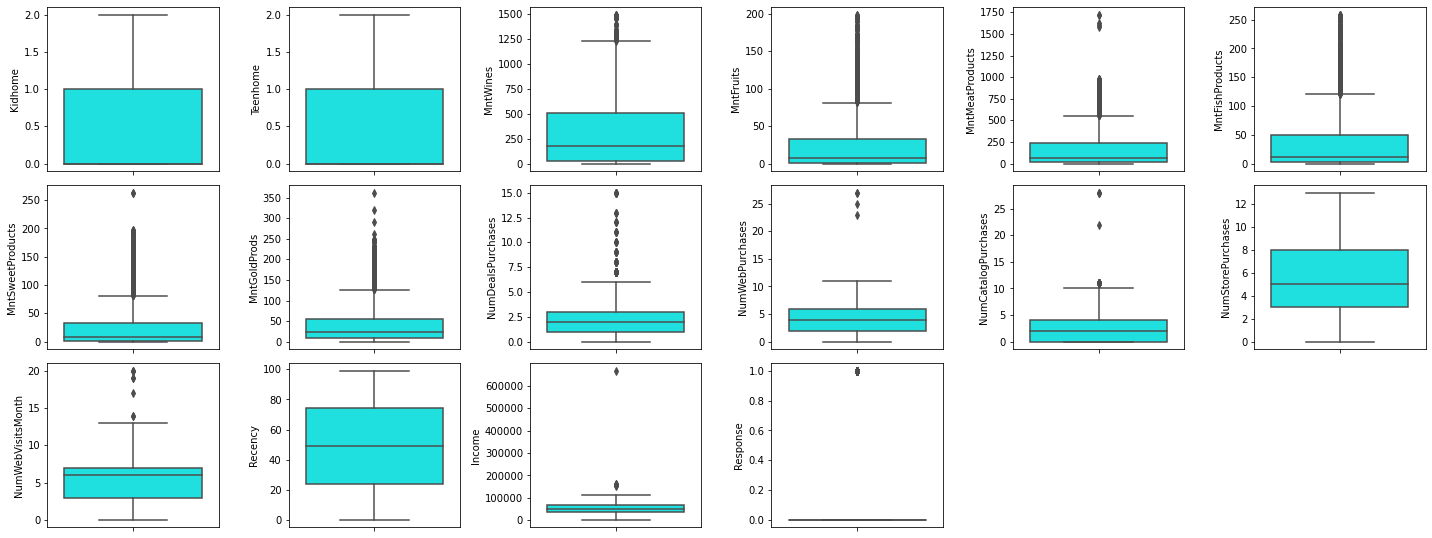

In [13]:
plt.figure(figsize=(20, 10))
for i in range(0, len(nc)):
    plt.subplot(4,6, i+1)
    sns.boxplot(y=data[nc[i]],color='cyan',orient='v')
    plt.tight_layout()

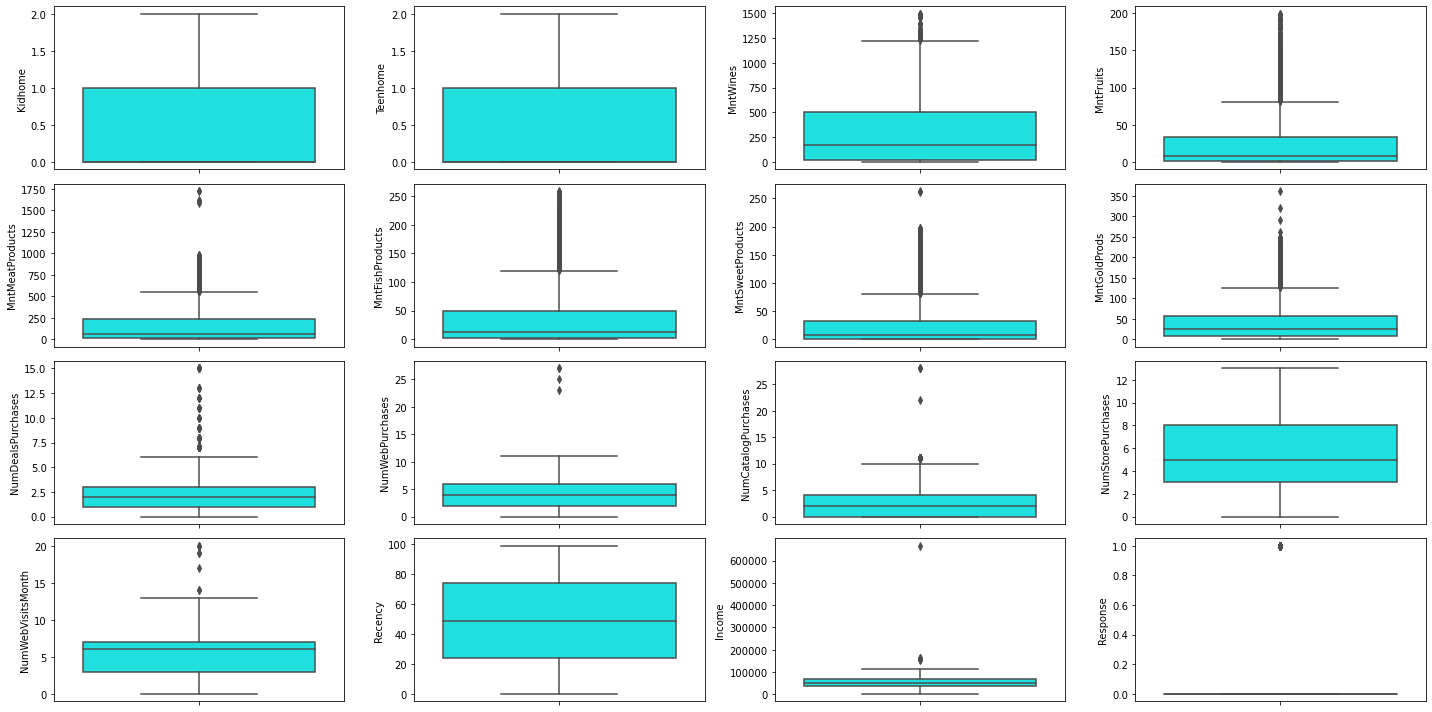

In [12]:
nc = list(numeric_data)
plt.figure(figsize=(20, 10))
for i in range(0, len(nc)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=numeric_data[nc[i]],color='cyan',orient='v')
    plt.tight_layout()

In [14]:
#we can handle outlier from Income first by drop the max value
numeric_data = numeric_data.drop(numeric_data.loc[numeric_data['Income'] > 200000].index)

In [13]:
numeric_data.describe()

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency,Income,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,49.109375,52247.251354,0.149107
std,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,28.962453,25037.797168,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000
25%,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,24.000000,35538.750000,0.000000
50%,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,49.000000,51741.500000,0.000000
75%,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,74.000000,68289.750000,0.000000
max,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,99.000000,666666.000000,1.000000


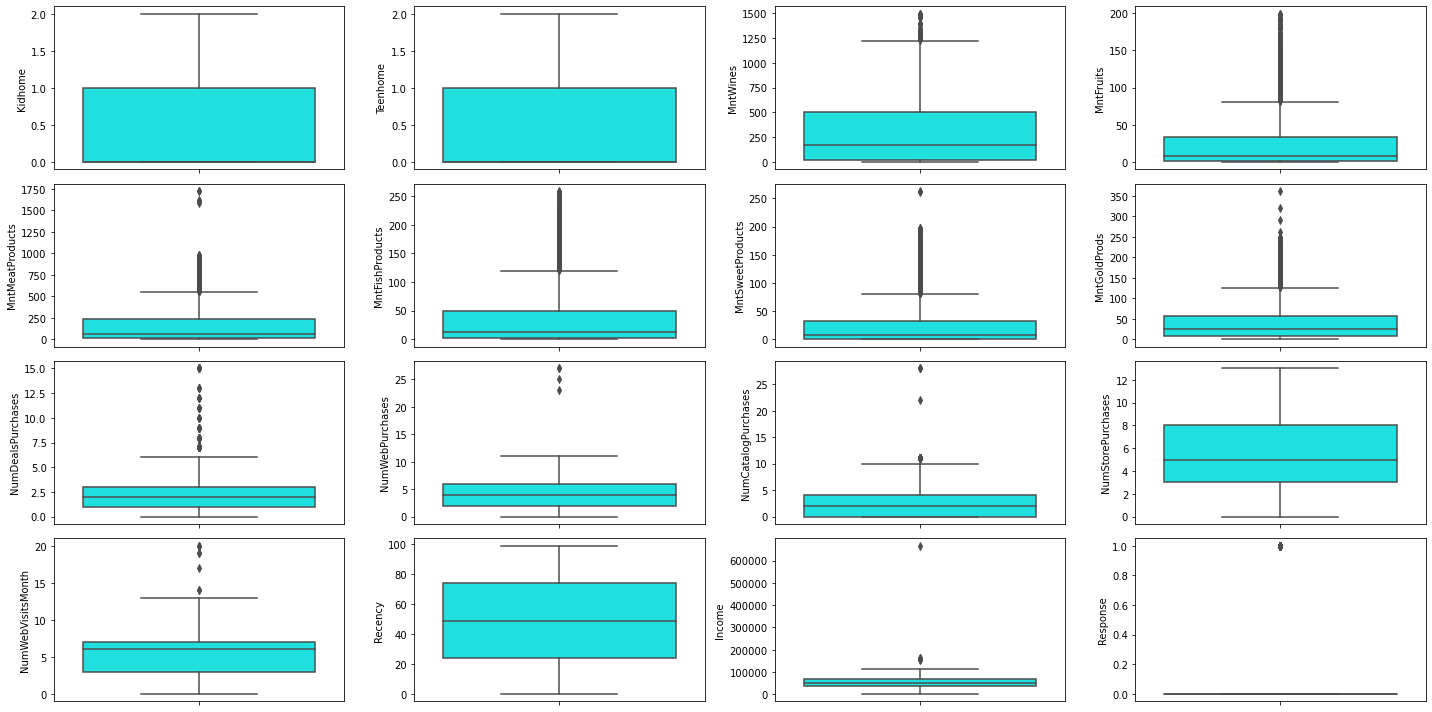

In [14]:
nc = list(numeric_data)
plt.figure(figsize=(20, 10))
for i in range(0, len(nc)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=numeric_data[nc[i]],color='cyan',orient='v')
    plt.tight_layout()

and for the other outlier we can handle using IQR method

In [16]:
len(numeric_data)

2240

In [17]:
Q1 = numeric_data['MntWines'].quantile(0.25)
Q3 = numeric_data['MntWines'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntWines'] >= low_limit) & (numeric_data['MntWines'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 2205


In [18]:
Q1 = numeric_data['MntFruits'].quantile(0.25)
Q3 = numeric_data['MntFruits'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntFruits'] >= low_limit) & (numeric_data['MntFruits'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1982


In [19]:
Q1 = numeric_data['MntMeatProducts'].quantile(0.25)
Q3 = numeric_data['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntMeatProducts'] >= low_limit) & (numeric_data['MntMeatProducts'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1757


In [20]:
Q1 = numeric_data['MntFishProducts'].quantile(0.25)
Q3 = numeric_data['MntFishProducts'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntFishProducts'] >= low_limit) & (numeric_data['MntFishProducts'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1531


In [21]:
Q1 = numeric_data['MntSweetProducts'].quantile(0.25)
Q3 = numeric_data['MntSweetProducts'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntSweetProducts'] >= low_limit) & (numeric_data['MntSweetProducts'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1416


In [22]:
Q1 = numeric_data['MntGoldProds'].quantile(0.25)
Q3 = numeric_data['MntGoldProds'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntGoldProds'] >= low_limit) & (numeric_data['MntGoldProds'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1283


In [23]:
Q1 = numeric_data['NumDealsPurchases'].quantile(0.25)
Q3 = numeric_data['NumDealsPurchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['NumDealsPurchases'] >= low_limit) & (numeric_data['NumDealsPurchases'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1239


In [24]:
Q1 = numeric_data['NumWebPurchases'].quantile(0.25)
Q3 = numeric_data['NumWebPurchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['NumWebPurchases'] >= low_limit) & (numeric_data['NumWebPurchases'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1199


In [25]:
Q1 = numeric_data['NumCatalogPurchases'].quantile(0.25)
Q3 = numeric_data['NumCatalogPurchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['NumCatalogPurchases'] >= low_limit) & (numeric_data['NumCatalogPurchases'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1109


In [26]:
Q1 = numeric_data['NumWebVisitsMonth'].quantile(0.25)
Q3 = numeric_data['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['NumWebVisitsMonth'] >= low_limit) & (numeric_data['NumWebVisitsMonth'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 1102


In [27]:
Q1 = numeric_data['MntWines'].quantile(0.25)
Q3 = numeric_data['MntWines'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((numeric_data['MntWines'] >= low_limit) & (numeric_data['MntWines'] <= high_limit))
numeric_data = numeric_data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(numeric_data))

Jumlah baris setelah memfilter outlier: 968


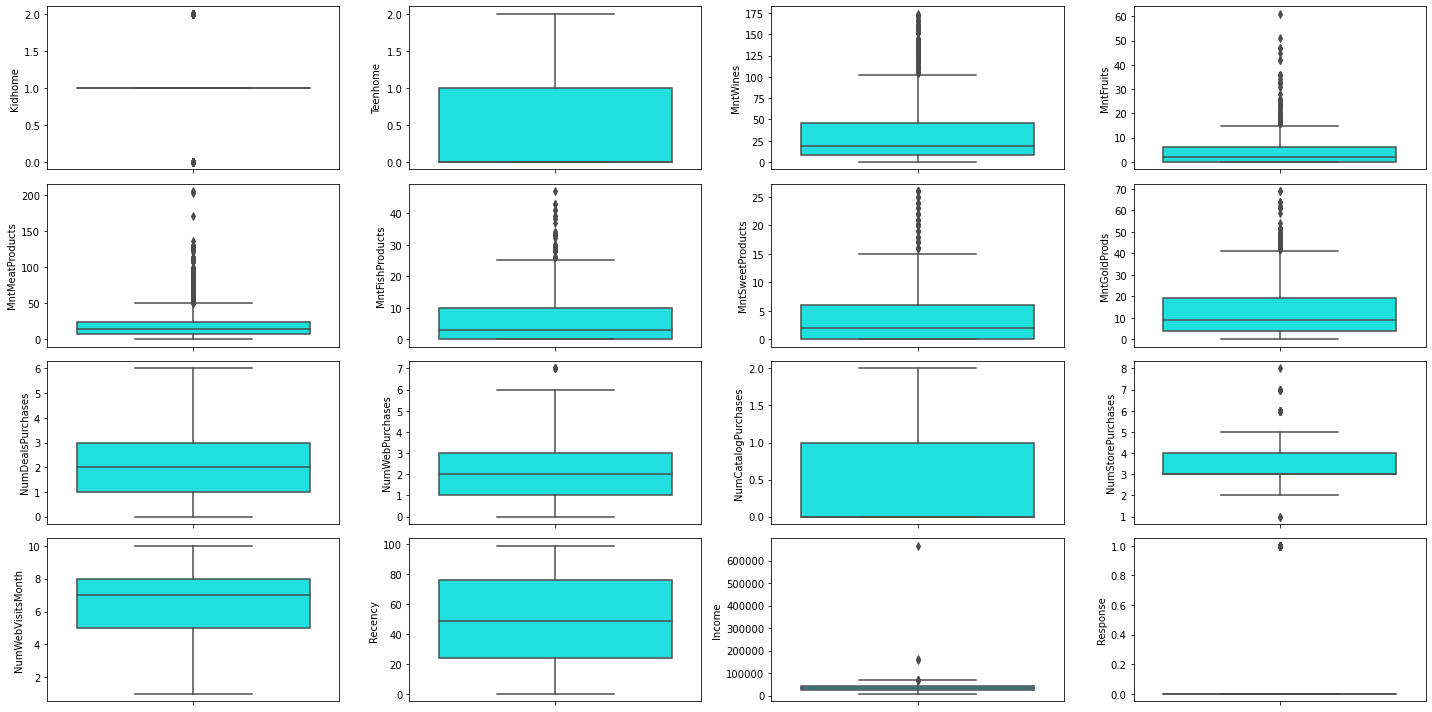

In [28]:
nc2 = list(numeric_data)
plt.figure(figsize=(20, 10))
for i in range(0, len(nc2)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=numeric_data[nc2[i]],color='cyan',orient='v')
    plt.tight_layout()

In [29]:
#now we can check the duplicate data again and handle it
numeric_data.duplicated().sum()

85

In [30]:
numeric_data = numeric_data.drop_duplicates()
print(f"now the duplicated data:", numeric_data.duplicated().sum())

now the duplicated data: 0


# Matrix Correlation

now we have to check the multicollinearity

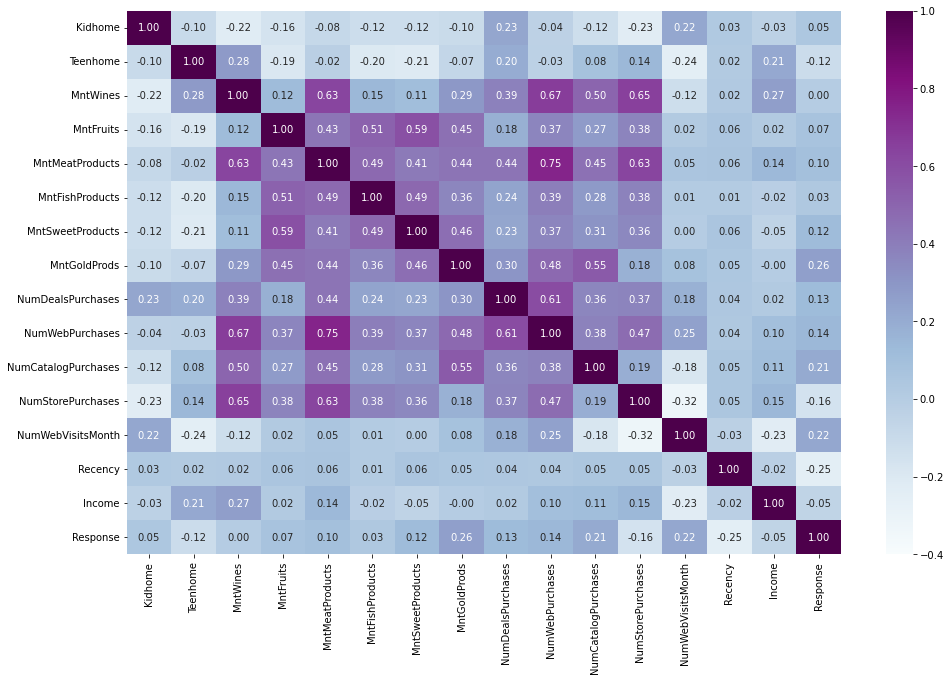

In [31]:
corr_= numeric_data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu", vmin = -0.4, vmax = 1.0)
plt.show()

there is 1 correlation have high value, between NumWebPurchases and MntMeatProducts
but we can leave it

In [32]:
numeric_data["Response"].value_counts()

0    802
1     81
Name: Response, dtype: int64

In [33]:
numeric_data.columns

Index(['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Recency', 'Income',
       'Response'],
      dtype='object')

we going to split the step, doing model with and without data imbalance

# Imbalance Data

# Penalized Regression

## Ridge Regression

First thing to do, we have to split the data before trying the model

with the ratio 1:4

In [34]:
from sklearn.model_selection import train_test_split

X = numeric_data.drop(columns='Response').to_numpy()
y = numeric_data[['Response']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42, normalize = True)
ridge_reg

Ridge(normalize=True, random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV

#for tuning the alpha
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(normalize=True, random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [37]:
#the result with normalize = True
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-0.270248,7
1,{'alpha': 1e-05},-0.270246,6
2,{'alpha': 0.0001},-0.270234,5
3,{'alpha': 0.001},-0.270114,4
4,{'alpha': 0.01},-0.269078,3
5,{'alpha': 0.1},-0.264926,1
6,{'alpha': 1},-0.267549,2
7,{'alpha': 5},-0.280233,8
8,{'alpha': 10},-0.284834,9
9,{'alpha': 20},-0.287952,10


In [38]:
#for the best model, we got alpha = 0.1
ridge_reg_gridcv.best_estimator_

Ridge(alpha=0.1, normalize=True, random_state=42)

In [39]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([-7.06801630e-03, -2.02882440e-02, -2.75848994e-04,  7.39025436e-04,
        1.15724090e-03, -2.85342891e-03,  2.13380270e-03,  3.81993426e-03,
        1.39841569e-02,  1.22081182e-03,  6.50569293e-02, -5.61492989e-02,
        2.15862586e-02, -2.29055826e-03, -1.62708412e-07])

In [40]:
#show the best estimator include intercept in dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + numeric_data.drop(columns='Response').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.460047e-01
1,Kidhome,-7.068016e-03
2,Teenhome,-2.028824e-02
3,MntWines,-2.758490e-04
4,MntFruits,7.390254e-04
5,MntMeatProducts,1.157241e-03
6,MntFishProducts,-2.853429e-03
7,MntSweetProducts,2.133803e-03
8,MntGoldProds,3.819934e-03
9,NumDealsPurchases,1.398416e-02


## Lasso

In [41]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(max_iter=10000, random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

#for tuning the alpha
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}


lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [43]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-0.270246,5
1,{'alpha': 1e-05},-0.270232,4
2,{'alpha': 0.0001},-0.270093,3
3,{'alpha': 0.001},-0.268797,2
4,{'alpha': 0.01},-0.264874,1
5,{'alpha': 0.1},-0.271218,6
6,{'alpha': 1},-0.286125,7
7,{'alpha': 5},-0.293247,10
8,{'alpha': 10},-0.293189,9
9,{'alpha': 20},-0.293075,8


In [44]:
#for the best model, we got alpha = 0.001
lasso_reg_gridcv.best_estimator_

Lasso(alpha=0.01, max_iter=10000, random_state=42)

In [45]:
# the coefficients of the best estimator (exclude intercept)
lasso_reg_gridcv.best_estimator_.coef_

array([ 0.00000000e+00, -0.00000000e+00, -4.08959345e-04,  6.00728551e-05,
        1.66244190e-03, -3.25951950e-03,  1.93980638e-03,  5.32759604e-03,
        3.64810357e-03,  0.00000000e+00,  3.18888997e-02, -4.55995549e-02,
        2.03259472e-02, -2.53155238e-03, -2.27758473e-07])

In [46]:
# the coefficients of the best estimator (exclude intercept)
lasso_reg_gridcv.best_estimator_.intercept_

0.1391632986529549

In [47]:
#show the best estimator include intercept in dataframe
coef_df_1 = pd.DataFrame({
    'feature':['intercept'] + numeric_data.drop(columns='Response').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df_1

,feature,coefficient
0,intercept,1.391633e-01
1,Kidhome,0.000000e+00
2,Teenhome,-0.000000e+00
3,MntWines,-4.089593e-04
4,MntFruits,6.007286e-05
5,MntMeatProducts,1.662442e-03
6,MntFishProducts,-3.259520e-03
7,MntSweetProducts,1.939806e-03
8,MntGoldProds,5.327596e-03
9,NumDealsPurchases,3.648104e-03


# K-NN Classification

In [176]:
from sklearn.model_selection import train_test_split

X = numeric_data.drop(columns='Response').to_numpy()
y = numeric_data[['Response']].to_numpy()
y = y.reshape(len(y),) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [178]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [179]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.029670,2
1,{'n_neighbors': 3},0.073626,1
2,{'n_neighbors': 4},0.014286,4
3,{'n_neighbors': 5},0.028571,3
4,{'n_neighbors': 6},0.000000,5
5,{'n_neighbors': 7},0.000000,5
6,{'n_neighbors': 8},0.000000,5


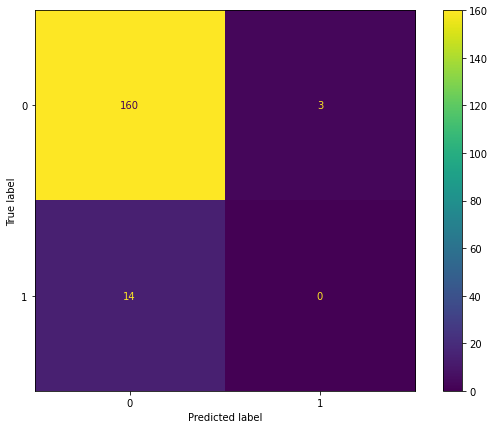

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [181]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       163
           1       0.00      0.00      0.00        14

    accuracy                           0.90       177
   macro avg       0.46      0.49      0.47       177
weighted avg       0.85      0.90      0.87       177



the model is bad because we got 0.0 for recall row

now we can use the weight, and hoping for the better result

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}


knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [72]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.029670,9
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.178022,1
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.073626,5
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.104396,3
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.014286,11
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.118681,2
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.028571,10
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.074725,4
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.000000,12
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.043956,6


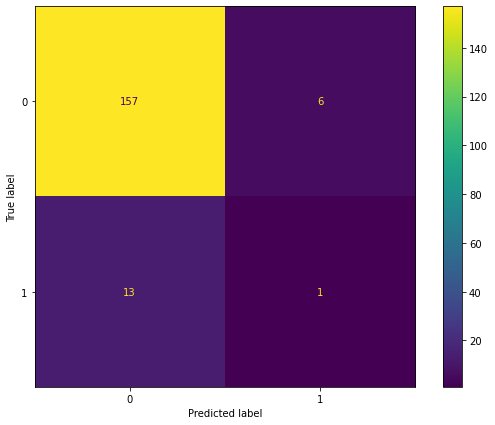

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [64]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.14      0.07      0.10        14

    accuracy                           0.89       177
   macro avg       0.53      0.52      0.52       177
weighted avg       0.86      0.89      0.88       177



we got the better result for plus 0.07, but still bad.
Now we can move on from this model

# Random Forest

In [74]:
from sklearn.model_selection import train_test_split

X = numeric_data.drop(columns='Response').to_numpy()
y = numeric_data[['Response']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [80]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.136264,1
15,"{'max_depth': 4, 'n_estimators': 10}",0.120879,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.106593,3
17,"{'max_depth': 4, 'n_estimators': 30}",0.105495,4
16,"{'max_depth': 4, 'n_estimators': 20}",0.105495,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.076923,6
21,"{'max_depth': 5, 'n_estimators': 20}",0.076923,6
23,"{'max_depth': 5, 'n_estimators': 40}",0.076923,6
19,"{'max_depth': 4, 'n_estimators': 50}",0.061538,9
18,"{'max_depth': 4, 'n_estimators': 40}",0.061538,9


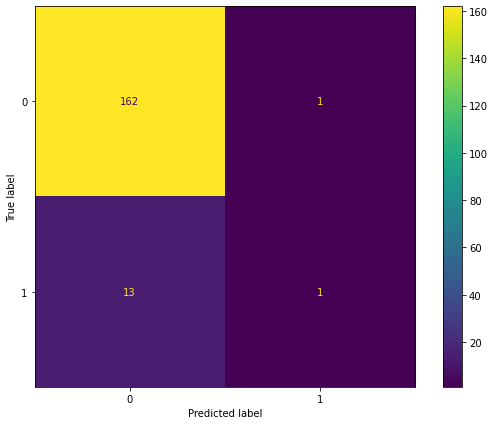

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# K-Means Clustering

In [151]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [157]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(numeric_data2.astype(float))

<AxesSubplot:>

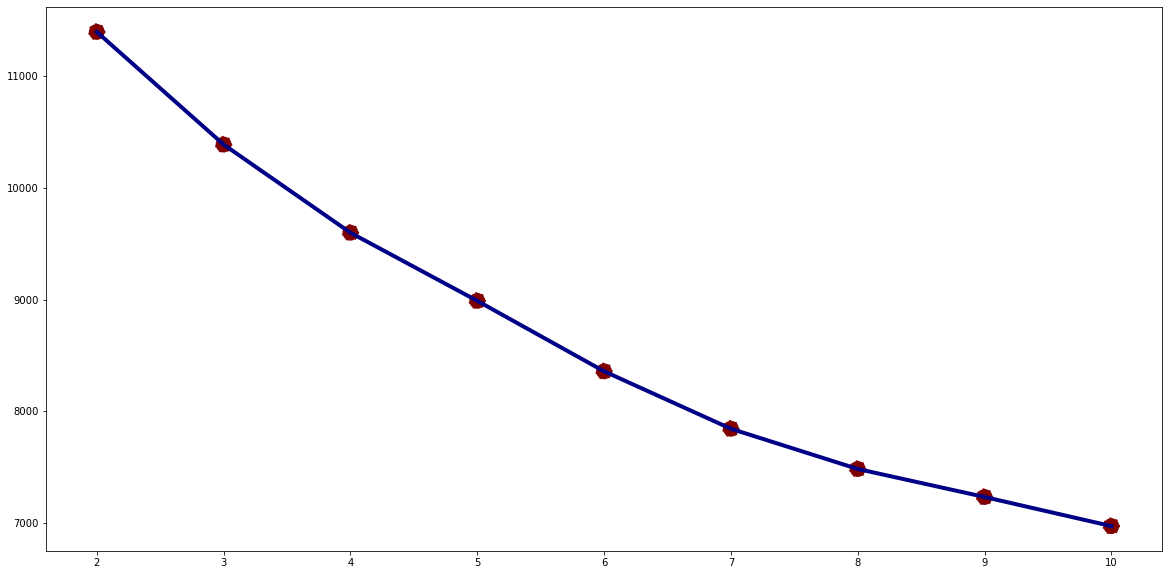

In [158]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [165]:
kmeans = KMeans(n_clusters=2, random_state=50).fit(data_std)

In [167]:
numeric_data2 = numeric_data.copy()

In [168]:
df_data_std = pd.DataFrame(data=data_std, columns=list(numeric_data2))

In [169]:
df_data_std['clusters'] = kmeans.labels_
numeric_data2['clusters'] = kmeans.labels_

In [170]:
pca = PCA(n_components=2)

pca.fit(df_data_std)
pcs = pca.transform(df_data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_data_std['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-1.580569,0.905259,1
1,-0.470584,-0.353038,1
2,1.703312,-0.403287,0
3,-1.197506,-2.324988,1
4,-2.326261,-0.627394,1


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

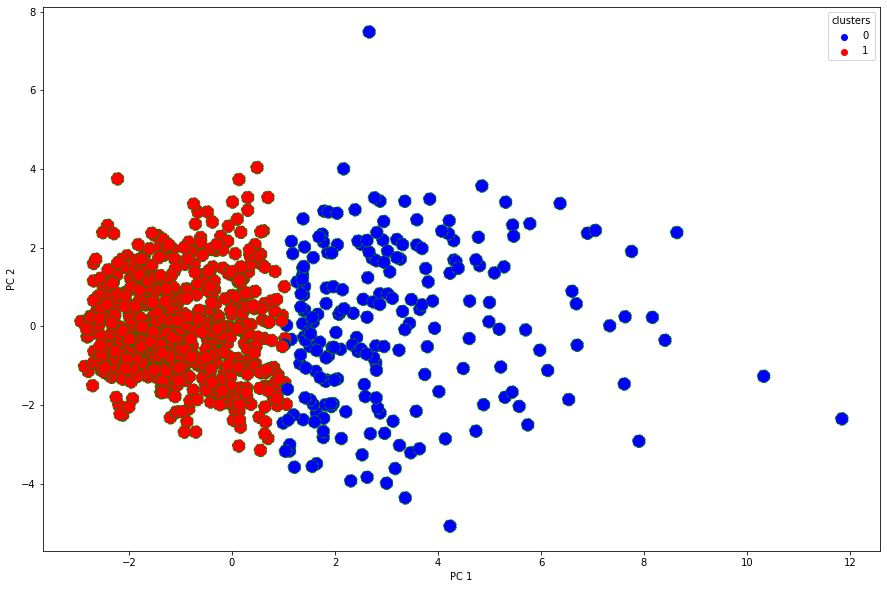

In [174]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red'],
    s=160,
    ax=ax
)

as the result using K-means Clustering, we can separate the data into different partitions
in this case, we got 2 clusster

In [175]:
display(numeric_data2.groupby('clusters').agg(['mean','median']))

Kidhome         Teenhome          MntWines         MntFruits  \
              mean median      mean median       mean median       mean   
clusters                                                                  
0         0.695853    1.0  0.488479    0.0  79.737327   77.0  10.364055   
1         0.843844    1.0  0.456456    0.0  21.039039   14.0   2.723724   

                MntMeatProducts         ... NumStorePurchases         \
         median            mean median  ...              mean median   
clusters                                ...                            
0           8.0       51.396313   44.0  ...          3.986175    4.0   
1           2.0       12.480480   11.0  ...          2.888889    3.0   

         NumWebVisitsMonth           Recency               Income           \
                      mean median       mean median          mean   median   
clusters                                                                     
0                 6.456221    7.0  51.345622   51.0  43417.937800  41713.0   
1                 6.322823    7.0  48.423423   48.5  33054.422316  32515.5   

          Response         
              mean median  
clusters                   
0         0.184332    0.0  
1         0.061562    0.0  

[2 rows x 32 columns]